In [1]:
import zipfile
with zipfile.ZipFile("data.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [3]:
listings_df = pd.read_csv("data/listings.csv")
calendar_df = pd.read_csv("data/calendar.csv")
reviews_df = pd.read_csv("data/reviews.csv")

# **Exploring The Dataset**

# 1. **listings**

In [4]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
listings_df.shape

(3818, 92)

In [6]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [7]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [8]:
listings_df.drop_duplicates(inplace=True, ignore_index=True)

In [10]:
listings_df.describe()

,id,scrape_id,host_id,latitude,longitude,accommodates,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,calculated_host_listings_count
count,3.818000e+03,3.818000e+03,3.818000e+03,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,47.628961,-122.333103,3.349398,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,2.946307
std,2.962660e+06,0.000000e+00,1.458382e+07,0.043052,0.031745,1.977599,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,5.893029
min,3.335000e+03,2.016010e+13,4.193000e+03,47.505088,-122.417219,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.258256e+06,2.016010e+13,3.275204e+06,47.609418,-122.354320,2.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,1.000000
50%,6.118244e+06,2.016010e+13,1.055814e+07,47.623601,-122.328874,3.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,1.000000
75%,8.035127e+06,2.016010e+13,2.590309e+07,47.662694,-122.310800,4.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,2.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,47.733358,-122.240607,16.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,37.000000


In [11]:
listings_df

,id,listing_url,scrape_id,last_scraped,name,description,experiences_offered,picture_url,host_id,host_url,...,availability_365,calendar_last_scraped,number_of_reviews,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,none,https://a1.muscache.com/ac/pictures/67560560/c...,956883,https://www.airbnb.com/users/show/956883,...,346,2016-01-04,207,f,WASHINGTON,f,moderate,f,f,2
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,none,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,...,291,2016-01-04,43,f,WASHINGTON,f,strict,t,t,6
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,none,https://a2.muscache.com/ac/pictures/b4324e0f-a...,16708587,https://www.airbnb.com/users/show/16708587,...,220,2016-01-04,20,f,WASHINGTON,f,strict,f,f,2
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,none,https://a0.muscache.com/ac/pictures/94146944/6...,9851441,https://www.airbnb.com/users/show/9851441,...,143,2016-01-04,0,f,WASHINGTON,f,flexible,f,f,1
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,none,https://a1.muscache.com/ac/pictures/6120468/b0...,1452570,https://www.airbnb.com/users/show/1452570,...,365,2016-01-04,38,f,WASHINGTON,f,strict,f,f,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,none,https://a2.muscache.com/ac/pictures/103217071/...,31148752,https://www.airbnb.com/users/show/31148752,...,32,2016-01-04,1,f,WASHINGTON,f,strict,f,f,8
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,none,https://a2.muscache.com/ac/pictures/626d4b1f-6...,46566046,https://www.airbnb.com/users/show/46566046,...,273,2016-01-04,2,f,WASHINGTON,f,moderate,f,f,1
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",none,https://a2.muscache.com/ac/pictures/a5974f04-2...,52791370,https://www.airbnb.com/users/show/52791370,...,88,2016-01-04,0,f,WASHINGTON,f,moderate,f,f,1
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,none,https://a2.muscache.com/ac/pictures/202e4ad6-b...,25522052,https://www.airbnb.com/users/show/25522052,...,179,2016-01-04,0,f,WASHINGTON,f,moderate,f,f,1


# **2. calendar**

In [12]:
calendar_df

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [13]:
calendar_df.dropna(inplace=True, ignore_index=True)

In [14]:
calendar_df.drop_duplicates(inplace=True, ignore_index=True)

In [15]:
calendar_df['price'] = calendar_df['price'].str.replace("$", "")
calendar_df['price'] = calendar_df['price'].str.replace(",", "")

In [16]:
calendar_df['available'] = calendar_df['available'].str.replace('[^t]', "False", regex=True)
calendar_df['available'] = calendar_df['available'].str.replace('[t]', "True", regex=True)

In [17]:
calendar_df['price'] = calendar_df['price'].astype(float)
calendar_df['available'] = calendar_df['available'].astype(bool)

In [18]:
calendar_df.describe()

,listing_id,price
count,9.345420e+05,934542.000000
mean,5.305517e+06,137.944859
std,2.974821e+06,105.062870
min,3.335000e+03,10.000000
25%,2.875975e+06,75.000000
50%,5.615620e+06,109.000000
75%,7.873345e+06,160.000000
max,1.034016e+07,1650.000000


In [19]:
calendar_df

,listing_id,date,available,price
0,241032,2016-01-04,True,85.0
1,241032,2016-01-05,True,85.0
2,241032,2016-01-13,True,85.0
3,241032,2016-01-14,True,85.0
4,241032,2016-01-18,True,85.0
...,...,...,...,...
934537,10208623,2016-01-06,True,87.0
934538,10208623,2016-01-07,True,87.0
934539,10208623,2016-01-10,True,87.0
934540,10208623,2016-01-11,True,87.0


# 3. **reviews_df**

In [20]:
reviews_df

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si..."


In [21]:
reviews_df.dropna(inplace=True, ignore_index=True)

In [22]:
reviews_df.describe()

,listing_id,id,reviewer_id
count,8.483100e+04,8.483100e+04,8.483100e+04
mean,3.005270e+06,3.058980e+07,1.701347e+07
std,2.472827e+06,1.636519e+07,1.353705e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725821e+07,5.053141e+06
50%,2.488228e+06,3.228949e+07,1.413622e+07
75%,4.694479e+06,4.457748e+07,2.762404e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


### Which area in seattle has the largest number of motels? Which area has the most motels with the highest average review score? Which area has the most expensive motels?

In [23]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'experiences_offered', 'picture_url', 'host_id', 'host_url', 'street',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'market', 'smart_location', 'country_code', 'country',
       'latitude', 'longitude', 'is_location_exact', 'room_type',
       'accommodates', 'bed_type', 'amenities', 'price', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'requires_license', 'jurisdiction_names',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count'],
      dtype='object')

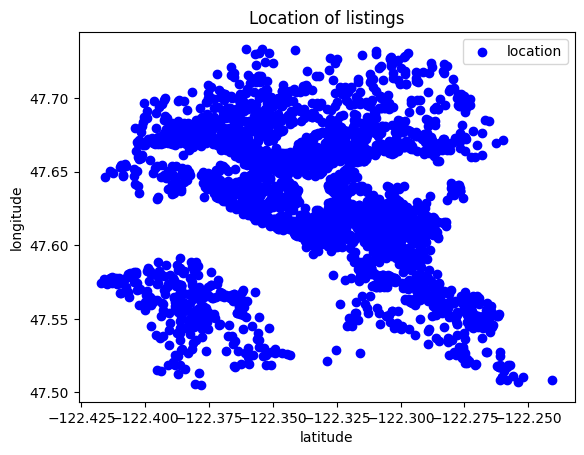

In [24]:
listings_clone = listings_df.copy()
listings_clone = listings_clone[["longitude", "latitude"]]
listings_clone.sort_values(["longitude", "latitude"], inplace=True)
plt.scatter(listings_clone.longitude, listings_clone.latitude, color='blue', label='location')
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.title("Location of listings")
plt.legend()
plt.show()

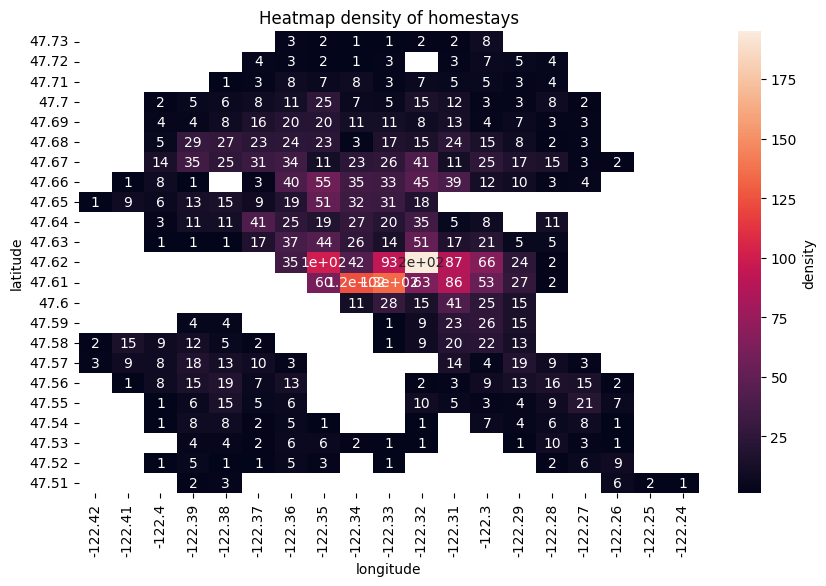

In [25]:
listings_clone = listings_df.copy()
listings_clone = listings_clone[["longitude", "latitude"]]
listings_clone = listings_clone.round(2)
listings_clone[["longitude", "latitude"]]
listings_clone["location"] = 1
listings_clone = listings_clone.groupby(["longitude", "latitude"]).sum()
temp = pd.DataFrame(listings_clone.index.to_list(),columns=["longitude", "latitude"])
temp["location"] = listings_clone.location.values
temp.sort_values(by="latitude", inplace=True)
plt.figure(figsize=(10, 6)) 
plt.title("Heatmap density of homestays")
listings_heatmap = temp.pivot(index="latitude", columns="longitude", values="location")
listings_heatmap.sort_index(ascending=False, inplace=True)
heatmap = sns.heatmap(listings_heatmap,  annot=True)
# Customize the color bar (legend)
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('density')  # Set the label for the color bar
colorbar.ax.tick_params(labelsize=10)  # Set the size of the color bar ticks

plt.show()

Homestays are distributed throughout the city, with the largest concentration in the city center.

In [27]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'experiences_offered', 'picture_url', 'host_id', 'host_url', 'street',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'market', 'smart_location', 'country_code', 'country',
       'latitude', 'longitude', 'is_location_exact', 'room_type',
       'accommodates', 'bed_type', 'amenities', 'price', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'requires_license', 'jurisdiction_names',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count'],
      dtype='object')